# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


**For clarity**, the above should maybe have been written in this way, with $\boldsymbol{e}$ as the residual, $\boldsymbol{e} = \boldsymbol{y} - \boldsymbol{\tilde{y}}$, so not to confuse it with the noise in $\boldsymbol{y}$: 
$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{e} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{e}
$$

We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}$ show that


$$
\mathbb{E}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \boldsymbol{\beta}.
$$

<u>**Answer:**</u> We remember that $\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}} = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \boldsymbol{y}$, so:

$$
\mathbb{E}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \mathbb{E} \left[ \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \boldsymbol{y} \right]
$$

Since the feature matrix $\boldsymbol{X}$ is non-stochastic we can treat everything to the left of $\boldsymbol{y}$ as a constant, and apply the linearity of the expectation value operator like this, $ \mathbb{E}[cA] = \mathbb{E}[c] \mathbb{E}[A] = c \mathbb{E}[A]$. The expectation value of a constant or non-stochastic variable is it self. We then have:
$$
\mathbb{E}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \mathbb{E} \left[ \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \right] \mathbb{E} \left[  \boldsymbol{y} \right] = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \mathbb{E} \left[  \boldsymbol{y} \right]
$$

For the last term we have $\boldsymbol{y} = f(\boldsymbol{x}) + \boldsymbol{\varepsilon} = \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$:
$$
\mathbb{E} \left[ \boldsymbol{y} \right] = \mathbb{E} \left[ f(\boldsymbol{x}) + \boldsymbol{\varepsilon} \right] = \mathbb{E} \left[ f(\boldsymbol{x}) \right] + \mathbb{E} \left[ \boldsymbol{\varepsilon} \right]
$$

The error term $\boldsymbol{\varepsilon}$ follows the normal distribution, with expectation value equal zero, so we are left with: $\mathbb{E} \left[ \boldsymbol{y} \right] = \mathbb{E} \left[ f(\boldsymbol{x}) \right] = \mathbb{E} \left[ \boldsymbol{X \beta} \right] = \boldsymbol{X \beta}$.

Returning to the main expression, we have: 
$$
\mathbb{E}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \boldsymbol{X \beta}
$$

$$
\mathbb{E}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \boldsymbol{\beta}
$$

Which we were to show.

**b)** Show that the variance of $\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}$ is


$$
\mathbf{Var}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$

We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}$.
A given parameter ${\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}}_j$ is given by the diagonal matrix element of the above matrix.


<u>**Answer:**</u> For the variance of a stochastic variable $X$ we have that:
$$
\mathbf{Var}(X) = \mathbb{E} \left[ X^2 \right] - \mathbb{E} \left[ X \right]^2
$$

We write:
$$
\mathbf{Var}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}) = \mathbb{E} \left[ \boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}^2 \right] - \mathbb{E} \left[ \boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}} \right]^2
$$

Using this expression we would have to take into account that we are dealing with vectors and matrices, and carefully construct it so to represent the squared terms correctly. It would also be quite some algebra to be done. Therefore we try to use some of the computational rules of the variance instead.
So we again start with the closed form:
$$
\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}} = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

Substituting, $y = \boldsymbol{X \beta} + \boldsymbol{\varepsilon}$:

$$
\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}} = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \left( \boldsymbol{X \beta} + \boldsymbol{\varepsilon} \right) 
$$

$$
= \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \boldsymbol{X \beta} + \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T  \boldsymbol{\varepsilon}
$$

$$
= \boldsymbol{\beta} + \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T  \boldsymbol{\varepsilon}
$$

Since $\beta$ is the true coefficient vector, it must have zero variance. we can also think of it as a vector that ads a constant value for each element in the vector representing the second term. Therefore this term is to be considered a constant. For vectors and matrices we have the following rule for the variance of a constant and a product: $\mathbf{Var}(\boldsymbol{a} + \boldsymbol{AM}) = \boldsymbol{A} \, \mathbf{Var}(\boldsymbol{M}) \, \boldsymbol{A}^T$, where $a$ is a non stochastic vector, $\boldsymbol{A}$ a non stochastic matrix, and $\boldsymbol{M}$ a vector with stochastic elements. Inserting directly from the expression above we have:

$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \, \mathbf{Var}(\boldsymbol{\varepsilon}) \, \left( \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \right)^T
$$

For $\boldsymbol{\varepsilon}$, which elements follows the normal distribution, we have from the definition $\boldsymbol{\sigma}^2$, or it could be written $\sigma^2 \, \boldsymbol{I}$. Now, taking the transpose above, and substituting in for the variance:

$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \, \sigma^2 \, \boldsymbol{I} \, \boldsymbol{X} \left( \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \right)^T
$$

Rearranging and combining factors:
$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, \left( \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \right)^T
$$

Further reading: Gram matrix..

## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


<u>**Answer:**</u> We remember that:
$$ \boldsymbol{\hat{\beta}_{\text{Ridge}}} = \left( \boldsymbol{X}^T\boldsymbol{X} + \lambda\boldsymbol{I} \right)^{-1}\boldsymbol{X}^T\boldsymbol{y} $$


From the derivation of $\mathbb{E}(\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}})$ above, we just smuggle in the $\lambda\boldsymbol{I}$ term since it is to be considered a constant, and thus won't affect the calculation:

$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{\text{Ridge}}}) = \mathbb{E} \left[ \left( \boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I}\right)^{-1} \boldsymbol{X}^T \right] \mathbb{E} \left[  \boldsymbol{y} \right] = \left( \boldsymbol{X}^T \boldsymbol{X} +\lambda\boldsymbol{I} \right)^{-1} \boldsymbol{X}^T \mathbb{E} \left[  \boldsymbol{y} \right]
$$

And we have seen that $\mathbb{E} \left[ \boldsymbol{y} \right] = \boldsymbol{X \beta}$, leading to:
$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{\text{Ridge}}}) = \left( \boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I} \right)^{-1} \boldsymbol{X}^T \boldsymbol{X \beta}
$$

Which we were to show.

**b)** Why do we say that Ridge regression gives a biased estimate? Is this a problem?


<u>**Answer:**</u> We say that Ridge regression gives a biased estimate because the it's a systematic error from the true coefficients $\boldsymbol{\beta}$. This is  

**c)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


<u>**Answer:**</u> Similar to what we did for the expectation value, we can use the variance of $\boldsymbol{\hat{\beta}_{OLS}}$, and smuggle in the $\lambda$ term, as it is just to be considered a non stochastic constant and thus won't effect any of the calculation leading up to the final expression. Meaning it just hides inside $A$ when we use the rule: $\mathbf{Var}(\boldsymbol{a} + \boldsymbol{AM}) = \boldsymbol{A} \, \mathbf{Var}(\boldsymbol{M}) \, \boldsymbol{A}^T$. Eventually leading to:
$$

\mathbf{Var}(\hat{\beta}_{\text{Ridge}}) = \left( \boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I} \right)^{-1} \boldsymbol{X}^T \, \sigma^2 \, \boldsymbol{I} \, \boldsymbol{X} \left( \left( \boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I} \right)^{-1} \right)^T
$$

$$
\mathbf{Var}(\hat{\beta}_{\text{Ridge}}) = \sigma^2 \, \left( \boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I} \right)^{-1} \boldsymbol{X}^T \boldsymbol{X} \left( \left( \boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I} \right)^{-1} \right)^T
$$

As we were to show.

## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\boldsymbol{\hat{\beta}_{OLS}}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$
and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

<u>**Answer:**</u> We start with: 
$$
C(\boldsymbol{X},\boldsymbol{\beta}) = \mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$

We have previously made the assumption that $\boldsymbol{y} = \boldsymbol{f} + \varepsilon$ which we subtitute intot he expression above. We also 

**b)** Explain what the terms mean and discuss their interpretations.


<u>**Answer:**</u> The bias of the predicted $y$ values, $\text{Bias}\left[\boldsymbol{\tilde y}\right]$ is the mean of the squared difference between prediction and true value. In other words the MSE of the prediction and true value. It is a metric over how much on average the prediction misses on the true value.
The variance of the prediction, $\tilde y$, is a measure how much the predictions varies from the expected prediction value based on the mean.  

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
# targets = np.random.rand(bootstraps, n) # wrong
targets = np.random.rand(1, n) # correct

In [276]:
print(np.mean(predictions))
print(np.mean(np.mean(predictions, axis=0)))

15.006949836719055
15.006949836719057


In [277]:
# Method of averaging over all samples first
mean_samples_predictions = np.mean(predictions, axis=0) # mean of each prediction index over all samples
targets = np.ravel(targets)

mse = mean_squared_error(targets, mean_samples_predictions)
bias = np.mean((targets - np.mean(mean_samples_predictions))**2)
variance = np.mean((mean_samples_predictions - np.mean(mean_samples_predictions))**2)

print(f"The MSE for targets and predictions: {mse:.4f}")
print(f"The bias: {bias:.4f}")
print(f"The variance: {variance:.4f}")

The MSE for targets and predictions: 210.6763
The bias: 210.6636
The variance: 0.0081


In [278]:
# Method of calculating values for each sample before taking averages
sq_error_pred_targ = (predictions - targets)**2 # squared errors of corresponding predictions and targets for each bootstrap sample
mean_samples_sq_error = np.mean(sq_error_pred_targ, axis=0) # average of the error for each datapoint across all samples
mse = np.sum(mean_samples_sq_error)/n

y = np.ravel(targets)
y_tilde = np.mean(predictions, axis=0)

bias = np.mean((y - np.mean(y_tilde))**2)
variance = np.mean((y_tilde - np.mean(y_tilde))**2)
#variance = np.mean((predictions - np.mean(predictions))**2)

print(f"The MSE for targets and predictions: {mse:.4f}")
print(f"The bias: {bias:.4f}")
print(f"The variance: {variance:.4f}")

The MSE for targets and predictions: 219.0463
The bias: 210.6636
The variance: 0.0081


There is something very weird going on with my variance estimates and I can't figure it out..

**b)** Change the prediction values in some way to increase the bias while decreasing the variance.



**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [24]:
n = 100
bootstraps = 100

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5*np.exp(-(x - 2)**2) + np.random.normal(0, 0.1, n)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

max_degree = 12
poly_degrees = np.arange(1, max_degree + 1, 1)

biases = np.zeros(max_degree)
variances = np.zeros(max_degree)
MSEs = np.zeros(max_degree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(len(poly_degrees)):
    poly_features = PolynomialFeatures(poly_degrees[degree], include_bias=True)
    X_train = poly_features.fit_transform(x_train)
    X_test = poly_features.transform(x_test)
    
    # predictions are later filled with predictions made from X_test (feature matrix), constructed from x_test, 
    # so got to have same length
    predictions = np.zeros([bootstraps, len(x_test)])

    for b in range(bootstraps):
        # For each bootstrap sample of X_train and Y_train, we train model, predict on X_test
        # Later comparing against the un-touched y_test
        #
        X_train_resampled, y_train_resampled = resample(X_train, y_train)

        model = LinearRegression().fit(X_train_resampled, y_train_resampled)
        predictions[b,:] = model.predict(X_test).ravel()

    # We take the true values or target, as the un-tough values in the y_test split
    # The predicted y values, lives in the predictions matrix, where each row is a sample of values,
    # and each column corresponding to a one y point across bootstrap samples 
    biases[degree] = np.mean((y_test.T - np.mean(predictions, axis=0))**2)

    # Var(prediction) is the mean of the flatend matrix, over all samples
    variances[degree] = np.mean((predictions - np.mean(predictions, axis=0))**2)

    # For the MSE, we take difference of each y point per bootstrap sample, making y_test a row vector
    # then squaring, before taking the mean over the flattened matrix
    
    MSEs[degree] = np.mean(np.mean((predictions - y_test.T)**2, axis=1), axis=0)


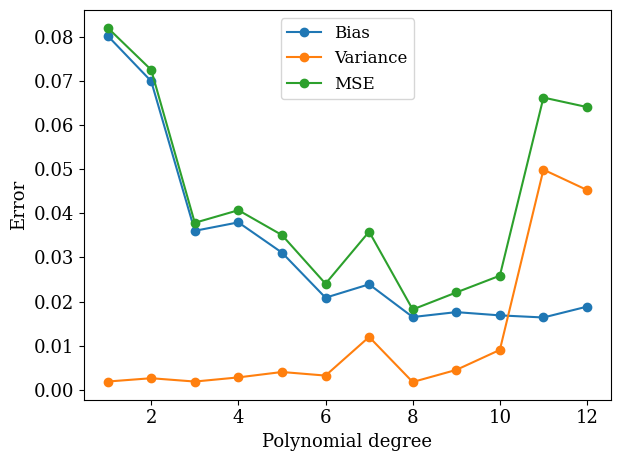

In [ ]:
plt.rcParams.update({
    'text.usetex': False,           # Use mathtext instead of full LaTeX
    'font.family': 'serif',
    'font.size': 13,
    'axes.titlesize': 13,
    'axes.labelsize': 13,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
})

plt.plot(poly_degrees, biases, 'o-', label="Bias", alpha=1.0)
plt.plot(poly_degrees, variances, 'o-', label="Variance", alpha=1.0)
plt.plot(poly_degrees, MSEs, 'o-', label="MSE", alpha=1.0)
#plt.title(f"Bias-variance tradeoff, for {n} data points and {bootstraps} bootstraps")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend(loc="upper center")
plt.savefig("bias_var_tradeoff.pdf", bbox_inches="tight")
plt.show()
plt.close()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).


<u>**Answer:**</u> There is something off here with the bias or MSE, but it seem to be correct in the code which corresponds to the expressions above. The bias + Var should be close to MSE.


**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


In [90]:
poly_degree = 5

n = 100
ns = np.arange(10, n, 10)

bootstraps = 100
              
x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5*np.exp(-(x - 2)**2) + np.random.normal(0, 0.2, n)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

biases = np.zeros(max_degree)
variances = np.zeros(max_degree)
MSEs = np.zeros(max_degree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

poly_features = PolynomialFeatures(poly_degrees[poly_degree], include_bias=True)
X_train = poly_features.fit_transform(x_train)
X_test = poly_features.transform(x_test)
    
# predictions are later filled with predictions made from X_test (feature matrix), constructed from x_test, 
# so got to have same length
predictions = np.zeros([bootstraps, len(x_test)])

for i in range(len(ns)):

for b in range(bootstraps):
    # For each bootstrap sample of X_train and Y_train, we train model, predict on X_test
    # Later comparing against the un-touched y_test
    X_train_resampled, y_train_resampled = resample(X_train, y_train)

    model = LinearRegression().fit(X_train_resampled, y_train_resampled)
    predictions[b,:] = model.predict(X_test).ravel()

# We take the true values or target, as the un-tough values in the y_test split
# The predicted y values, lives in the predictions matrix, where each row is a sample of values,
# and each column corresponding to a one y point across bootstrap samples 
biases[degree] = np.mean((y_test - np.mean(predictions, axis=0))**2)

# Var(prediction) is the mean of the flatend matrix, over all samples
variances[degree] = np.mean((predictions - np.mean(predictions, axis=0))**2)

# For the MSE, we take difference of each y point per bootstrap sample, making y_test a row vector
# then squaring, before taking the mean over the flattened matrix

MSEs[degree] = np.mean(np.mean((predictions - y_test.T)**2, axis=0), axis=0)

plt.plot(biases, 'o-', label="Bias")
plt.plot(variances, 'o-', label="Variance")
plt.plot(MSEs, 'o-', label="MSE")
plt.title(f"Bias-variance tradeoff, for {n} data points and {bootstraps} bootstraps")
plt.xlabel("")
plt.legend()
plt.show()
plt.close()

IndentationError: expected an indented block after 'for' statement on line 28 (3118860759.py, line 30)

Work in progress..

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

**d)** Why do we say that the Ridge method gives a biased model?

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

**h)** What is an advantage of the R2 score over the MSE?


<u>Answers:</u>
**a)** We scale data so that features with large numerical value won't override the other features. Also, the unit of the feature might play in on the fit, for instance pounds vs. kg.

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726029
Var: 0.004579219539673836
0.08426840630693411 >= 0.07968918676726029 + 0.004579219539673836 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548984
Var: 0.003215318065760509
0.10398646080125035 >= 0.10077114273548984 + 0.003215318065760509 = 0.10398646080125035
Polynomial degree: 3
Error: 0.06547790180152357
Bias^2: 0.06208238634231953
Var: 0.0033955154592040944
0.06547790180152357 >= 0.06208238634231953 + 0.0033955154592040944 = 0.06547790180152363
Polynomial degree: 4
Error: 0.06844519414009438
Bias^2: 0.06453579006728315
Var: 0.003909404072811231
0.06844519414009438 >= 0.06453579006728315 + 0.003909404072811231 = 0.06844519414009438
Polynomial degree: 5
Error: 0.05227921801205692
Bias^

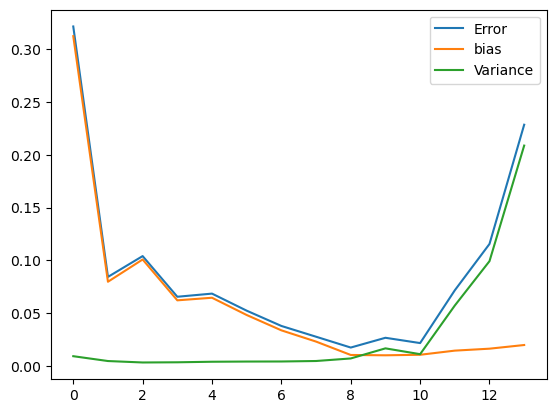

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()